# Plotting in Python with Matplotlib

### Intro to Astronomy 2020, week 2.

Written by Ryan Rubenzahl, with small tweaks from Aldo Panfichi. Many parts of this notebook build on the official matplotlib tutorial at https://matplotlib.org/users/pyplot_tutorial.html, as well as an intro-to-Python primer written by Segev BenZvi for PHY 403, a graduate course on data science and statistics at the University of Rochester.

## What is Matplotlib?

Matplotlib is the main plotting library in Python. Whenever you need to make any sort of plot or graph to represent your data, matplotlib will be your friend. It can be used to produce the usual xy scatter plots, contour plots, histograms, etc. for all your data visualization needs.

I strongly recommend that you go to the Matplotlib website and check out the huge <a href="http://matplotlib.org/gallery.html">plot gallery</a>. This is the easiest way to learn how to make a particular kind of plot, and to see all the different kinds of plots you can make using Matplotlib.

**Note**: when you want to plot something in a Jupyter notebook, put the magic line

`%matplotlib inline`

before you import the `matplotlib` module. This way, plots will appear embedded in the notebook below the executed cell, rather than appearing in a pop-up window.

If you are running Python from a .py script and the command line, make sure to include `plt.show()` after creating your plot so that it actually appears (this will make a pop-up window).

In [1]:
%matplotlib inline

import matplotlib as mpl        # This is the main matplotlib library
import matplotlib.pyplot as plt # This is the plotting module

In [2]:
import numpy as np
# numpy is a package that contains many useful mathematical functions
# We will be using it to generate fake data to make our plots with

In [3]:
mpl.rc('font', family='sans serif', size=16) # Set global font properties

# How to make a basic plot

First, lets generate some fake data for us to plot

In [4]:
x = np.linspace(-10, 10, 100) # Generates 100 equally-spaced points between x=-10 and x=10
y = x**2 # A simple parabola

#print(x) # What does this data look like?
print(y)

[1.00000000e+02 9.60004081e+01 9.20824406e+01 8.82460973e+01
 8.44913784e+01 8.08182838e+01 7.72268136e+01 7.37169677e+01
 7.02887460e+01 6.69421488e+01 6.36771758e+01 6.04938272e+01
 5.73921028e+01 5.43720029e+01 5.14335272e+01 4.85766758e+01
 4.58014488e+01 4.31078461e+01 4.04958678e+01 3.79655137e+01
 3.55167840e+01 3.31496786e+01 3.08641975e+01 2.86603408e+01
 2.65381084e+01 2.44975003e+01 2.25385165e+01 2.06611570e+01
 1.88654219e+01 1.71513111e+01 1.55188246e+01 1.39679625e+01
 1.24987246e+01 1.11111111e+01 9.80512193e+00 8.58075707e+00
 7.43801653e+00 6.37690032e+00 5.39740843e+00 4.49954086e+00
 3.68329762e+00 2.94867871e+00 2.29568411e+00 1.72431385e+00
 1.23456790e+00 8.26446281e-01 4.99948985e-01 2.55076013e-01
 9.18273646e-02 1.02030405e-02 1.02030405e-02 9.18273646e-02
 2.55076013e-01 4.99948985e-01 8.26446281e-01 1.23456790e+00
 1.72431385e+00 2.29568411e+00 2.94867871e+00 3.68329762e+00
 4.49954086e+00 5.39740843e+00 6.37690032e+00 7.43801653e+00
 8.58075707e+00 9.805121

Next, lets plot it using `pyplot` by calling `plt.plot`.

We can also set attributes of the plot like the x-axis label, y-axis label, and title.

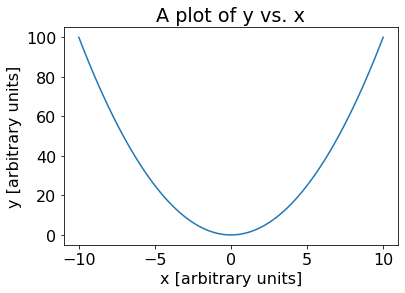

In [5]:
fig = plt.figure()
plt.plot(x, y)
plt.xlabel("x [arbitrary units]")
plt.ylabel("y [arbitrary units]")
plt.title("A plot of y vs. x")
plt.show()

`plt.plot` creates lines by default, as we saw above. If we wanted to see the points, we could instead make a `scatter` plot or set the "fmt" option of plt.plot

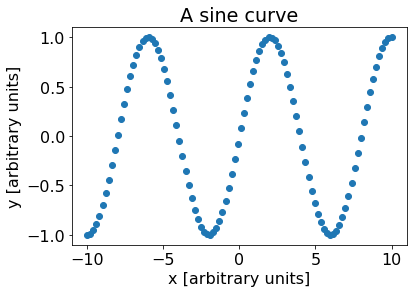

In [6]:
# First, using plt.scatter()

fig = plt.figure()
y2 = np.sin(2*np.pi*x/8)

#plt.plot(x, y2) # Lines, by default
plt.scatter(x, y2) # using plt.scatter

plt.xlabel("x [arbitrary units]")
plt.ylabel("y [arbitrary units]")
plt.title("A sine curve")
plt.show()

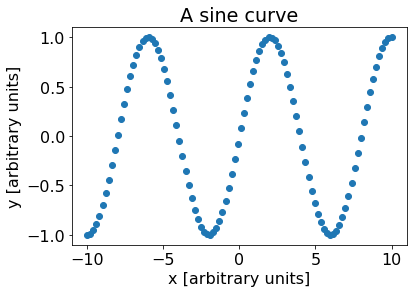

In [7]:
# Now, by changing the plt.plot() parameters

fig = plt.figure()
y2 = np.sin(2*np.pi*x/8)

#plt.plot(x, y2) # Lines, by default
plt.plot(x, y2, 'o') # Dots
#plt.plot(x, y2, 'o-') # Dots + lines

plt.xlabel("x [arbitrary units]")
plt.ylabel("y [arbitrary units]")
plt.title("A sine curve")
plt.show()

Pretty straightforward.

If we have a dataset that includes uncertainties on the y-values, for example, we can make an `errorbar` plot to include errorbars like so:

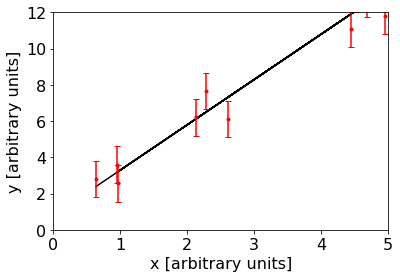

In [8]:
fig = plt.figure()

x = 5*np.random.random(10) # 10 randomly spaced points between 0 and 5
y = 2.5*x + 0.8  # A simple linear equation

# Real data tends to be "noisy" - let's simulate that here

err = 1 # Size of errorbars - play around with this parameter!
noise = np.random.normal(scale=err, size=len(x)) # Gaussian/normal "noise"
y_data = y + noise # Adding the noise to the y-values to simulate noisy data

plt.plot(x, y, color='k')    # Makes a line, color='k' is black
plt.errorbar(x, y_data, yerr=err, fmt='.', 
             capsize=3, color='r') # Red colored points

plt.xlabel('x [arbitrary units]')
plt.ylabel('y [arbitrary units]')

# We can also set some other formatting options, like axis limits
plt.xlim(0, 5)  # x-axis range from 0 (lower limit) to 5 (upper limit)
plt.ylim(0, 12) # Same for y-axis

plt.show()

## Multiple datasets with a legend

We could also plot multiple datasets, give them different colors/symbols, and add a legend to the plot to distiguish these.

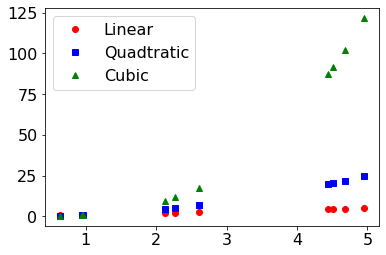

In [9]:
fig = plt.figure()

plt.plot(x, x,    'ro', label='Linear')     # ro = red circles
plt.plot(x, x**2, 'bs', label='Quadtratic') # bs = blue squares 
plt.plot(x, x**3, 'g^', label='Cubic')      # g^ = green triangles

plt.legend(loc='best')
plt.show()

## There are many different syntaxes to make a plot

Below, we create a separate `figure` and `axes` objects to control different aspects of the plot. The `figure` controls properties of the entire figure, and each `axes` controlls a specific "subplot"

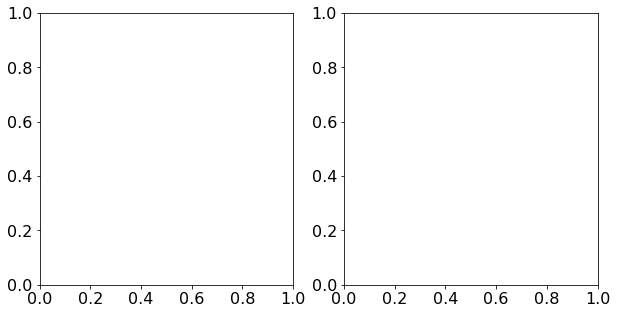

In [10]:
# We're going to create a figure containing 1 row and 2 columns
# This will lets us have 2 side-by-side figures


# We can also set the figure size (width, height) [in inches]
fig = plt.figure(figsize=(10, 5))

ax1 = plt.subplot(1,2, 1)             # nrows, ncols, index
ax2 = plt.subplot(1,2, 2, sharex=ax1) # nrows, ncols, index,
                                      # also share x-axis with subplot 1

plt.show()

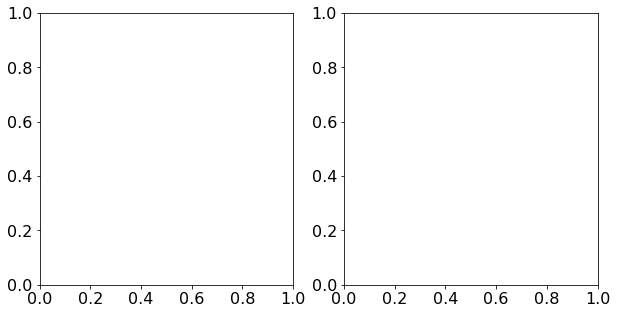

In [11]:
# Here, we can do the same thing as above but in one line
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Axes is a list, with axes[0] the first subplot and axes[1] the second
axes

plt.show()

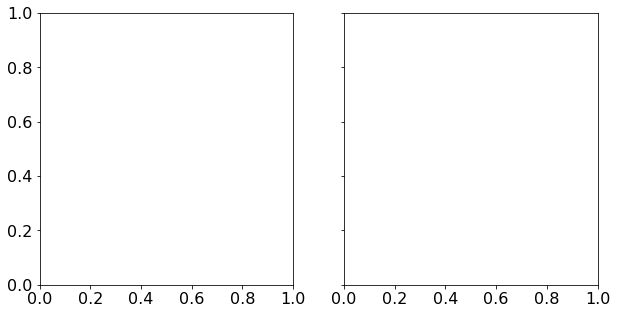

In [12]:
# We could also write it as
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
# Note what sharey does compared to above

plt.show()

Where now we would use `ax1` instead of `axes[0]` and `ax2` instead of `axes[1]`

We've also specified here that both subplots share the same y-axis

## Lets fill-in the two subplots with different data

We can even use LaTeX-formatted math as text in figures (You'll see more about this in Week 8)

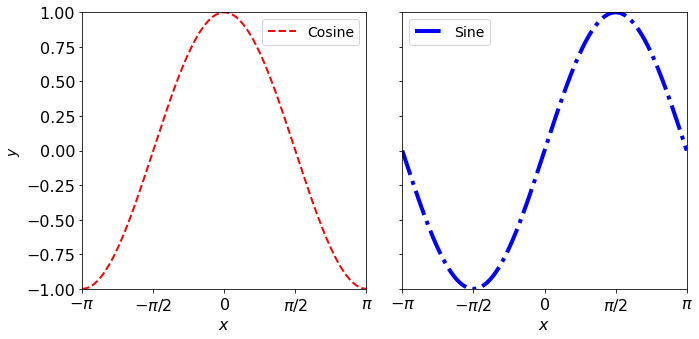

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)

x = np.linspace(-np.pi, np.pi, 1000, endpoint=True) # remember linspace?
c = np.cos(x)
s = np.sin(x)

ax1.plot(x, c, label="Cosine", color="r", linestyle="--", linewidth=2)
ax2.plot(x, s, label="Sine",   color="b", linestyle="-.", linewidth=4)

# When working with axes, you have to use the "set" attribute
ax1.set_xlabel("$x$")
ax1.set_xlim(-np.pi,np.pi)
ax2.set_xlabel("$x$")
ax2.set_xlim(-np.pi,np.pi)

# Override default ticks and labels
xticks = [-np.pi,   -0.5*np.pi,   0,   0.5*np.pi,  np.pi]
labels = ["$-\pi$", "$-\pi/2$", "$0$", "$\pi/2$", "$\pi$"]

ax1.set_xticks(xticks)
ax1.set_xticklabels(labels)
ax2.set_xticks(xticks)
ax2.set_xticklabels(labels)

ax1.set_ylabel("$y$", fontsize=14) # Could specify different fontsizes
ax1.set_ylim(-1,1) # The two plots share the same y-axis

# Alternatively, do it all at once! Nice and compact like
ax1.set(xlabel='$x$', xlim=[-np.pi, np.pi], ylabel='$y$', ylim=[-1, 1],
        xticks=xticks, xticklabels=labels)

# Add a legend to each subplot
ax1.legend(loc="best", fontsize=14, numpoints=1)
ax2.legend(loc="best", fontsize=14, numpoints=1)

fig.tight_layout()
plt.show()

# Histograms

Lets create some Gaussian-distributed (Normal) random values and plot them in a histogram.
We're going to work through this code line by line and see how this affects our final plot.

If you need a refresher on what a Normal Distribution is, check out: https://statisticsbyjim.com/basics/normal-distribution/

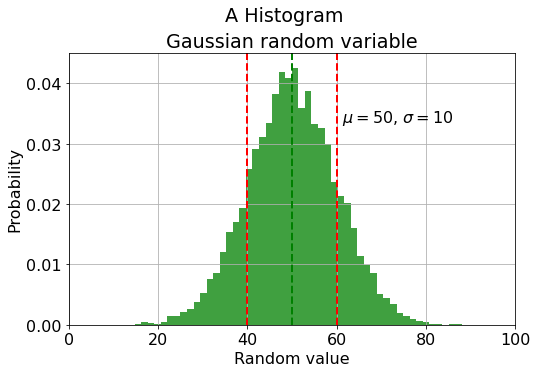

In [14]:
mean  = 50 # Mean
stdev = 10 # Standard deviation
N = 10000  # number of points to generate

x = np.random.normal(loc=mean, scale=stdev, size=N)
# random, normally distributed data points

# Histogram the data
fig, ax = plt.subplots(1,1, figsize=(8,5))
n, bins, patches = ax.hist(x, bins=50, density=1, 
                            facecolor='g', alpha=0.75)
#Play around with the hist() variables, see how they affect the plot!

ax.set(xlabel='Random value', ylabel='Probability', 
       title='Gaussian random variable', xlim=[0, 100], ylim=[0, 0.045])
       
ax.grid(True) # Shows gridlines

# Draw a vertical line at the mean and +/- 1 standard deviation
ax.axvline(mean, ls='--', color='g', lw=2)
ax.axvline(mean+stdev, ls='--', color='r', lw=2)
ax.axvline(mean-stdev, ls='--', color='r', lw=2)

fig.suptitle('A Histogram', y=1.01) # suptitle sets overall figure title
                                # The ax.set_title() is for each subplot

# Annotate the figure by placing text describing the mean and stdev
fig.text(0.6, .7, r'$\mu={:d}$, $\sigma={:d}$'.format(mean, stdev),
                    horizontalalignment='left', # abbreviate with ha=
                    verticalalignment='center')   # "  " va=

plt.show()

# Saving figures

You can output your figure to an image file using the `plt.savefig` command. This produces a higher-res version of your figure for use in presentations or papers. Some possible output formats are 
1. .pdf: probably the most commonly used. Works with transparent figures.
2. .png: also good, not as flexible as pdf, also good with transparencies.
3. .eps: vectorized (instead of saving a grid of pixels & colors, instructions for "how to draw the figure" are saved so that one can infinitely zoom into their image), best option for figures that need high-resolution. However, transparencies *don't work* in vectorized form.

Always use `bbox_inches='tight'`!

In [15]:
plt.savefig('name_of_figure.eps', format='eps', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [16]:
plt.savefig('name_of_figure.pdf', format='pdf', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

# Conclusion

Matplotlib is great! It allows you to quickly and easily visualize any form of data you might come across in physics and astronomy, and has a lot of room for customization, allowing you to make your figures look however you want them to. Extra points if your figures are clear and understandable to your peers.

Oftentimes, as you're skimming a paper, one of the most common features to pay attention to are the figures and/or graphs because they can usually summarize a lot of the main points that an author is trying to make. In that vein, both clarity of presentation and accuracy of results are important, and matplotlib will be your friend in doing both.

Keep an eye out for Isaac's tutorial on figure aesthetics in Week 9!

# You make a plot!

Below are some fake data for you to plot. Try making a plot that has three axes on top of each other
1. (Top plot): A scatterplot of the data. Add in errorbars for the y-values.
2. (Middle plot): Draw a straight line through the data, tweaking the values for the line until it looks like it goes through all the points equally well. Make a legend specifying the line from the data.
3. (Bottom plot): A histogram of the x and y data on a single plot.

In [17]:
x = np.array([7.1,9.4,9.1,3.6,2.6,4.1,3.8,6.4,8.8,9.8,
              6.0,9.8,8.5,0.6,5.9,7.5,0.9,5.5,4.6,9.])
y = np.array([21.0,25.3,24.8,10.0,9.2,9.0,11.3,17.0,24.0,27.1,
              18.0,25.8,23.2,4.0,17.2,19.1,2.9,13.6,11.4,25.])
yerr = 1

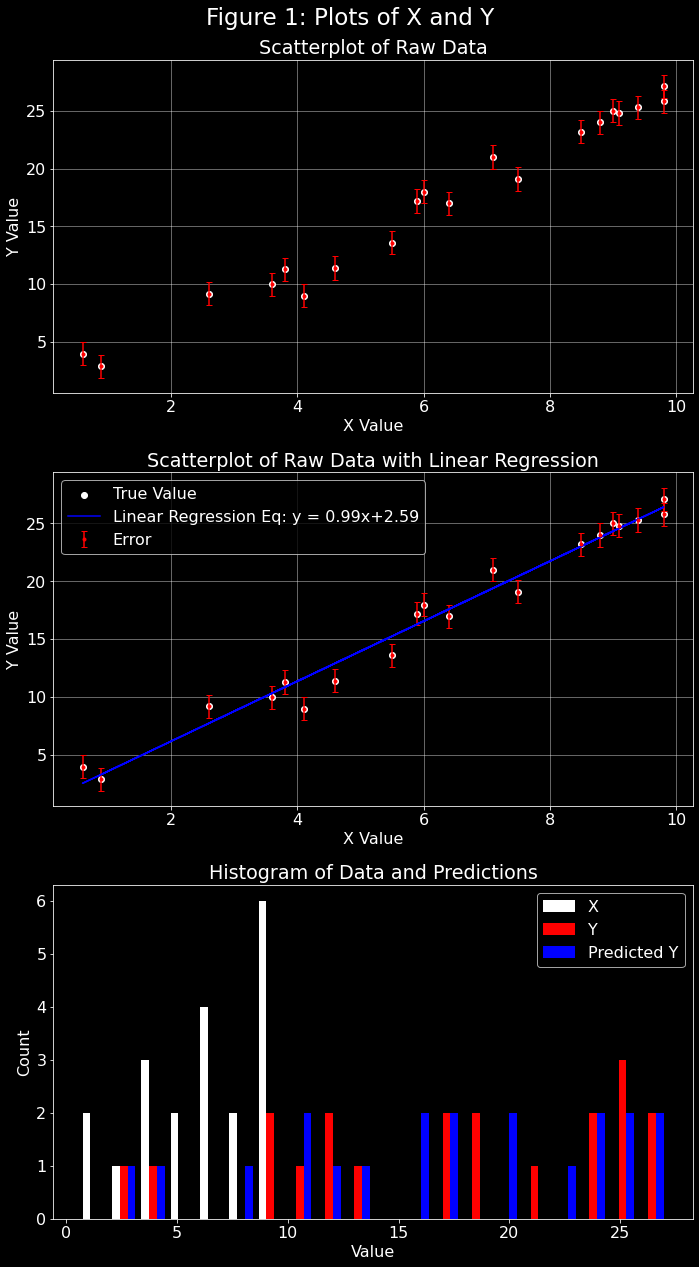

In [18]:
# Create fig and axes objects for subplots with 1 column and 3 rows
plt.style.use('dark_background')
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10,18))
fig.suptitle('Figure 1: Plots of X and Y', fontsize = 'x-large')

# Subplot 1
ax1.scatter(x, y, color = 'w')
ax1.errorbar(x, y, yerr = yerr, fmt = '.', capsize = 3, color = 'r')
ax1.set_title('Scatterplot of Raw Data')
ax1.set_xlabel('X Value')
ax1.set_ylabel('Y Value')
ax1.grid(visible = True, alpha = 0.5)

# Subplot 2
ax2.scatter(x, y, color = 'w')
ax2.errorbar(x, y, yerr = yerr, fmt = '.', capsize = 3, color = 'r')

trend = np.polyfit(x, y, deg = 1)
pred = np.poly1d(trend)
y_pred = pred(x)

ax2.plot(x, y_pred, color = 'b')
ax2.legend(['True Value', 
            'Linear Regression Eq: y = {:.2f}x+{:.2f}'.format(pred[0], pred[1]), 
            'Error'], loc = 'best')
ax2.set_title('Scatterplot of Raw Data with Linear Regression')
ax2.set_xlabel('X Value')
ax2.set_ylabel('Y Value')
ax2.grid(visible = True, alpha = 0.5)

# Subplot 3
ax3.hist([x, y, y_pred], bins = len(x), color = ['w', 'r', 'b'])
ax3.legend(['X', 'Y', 'Predicted Y'], loc = 'best')
ax3.set_title('Histogram of Data and Predictions')
ax3.set_xlabel('Value')
ax3.set_ylabel('Count')

# Don't forget to call fig.tight_layout()
fig.tight_layout()
plt.show()